In [89]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [22]:
x = np.random.random(size=50)
y = 4 * x - 2 + np.random.random(size=50)

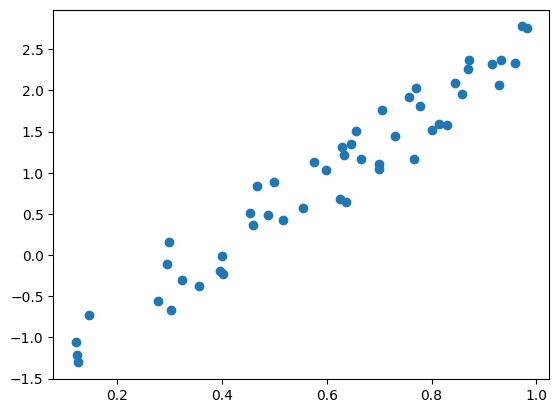

In [23]:
plt.plot(x, y, 'o')
plt.show()

In [79]:
def train_test_error(X_train, y_train, X_test, y_test, gamma):
    m = SVR(kernel='rbf', gamma=gamma, C=10)
    m.fit(np.expand_dims(X_train, axis=1), y_train)
    train_error = metrics.mean_squared_error( \
        m.predict(np.expand_dims(X_train, axis=1)), y_train)
    test_error = metrics.mean_squared_error( \
        m.predict(np.expand_dims(X_test, axis=1)), y_test)
    return train_error, test_error

In [74]:
def train_test_error_trajectory(X_train, y_train, X_test, y_test, gammas):
    return np.array([train_test_error(X_train, y_train, X_test, y_test, g)
                     for g in gammas]).T

In [75]:
def get_X_y(n):
    X = np.random.random(size=n)
    y = 4 * X - 2 + np.random.random(size=n)
    return X, y

In [76]:
X_train, y_train = get_X_y(50)
X_test, y_test = get_X_y(1000)
gammas = np.logspace(-2, 1, 20)
train_tr, test_tr = train_test_error_trajectory(X_train, y_train,
                                                X_test, y_test, gammas)

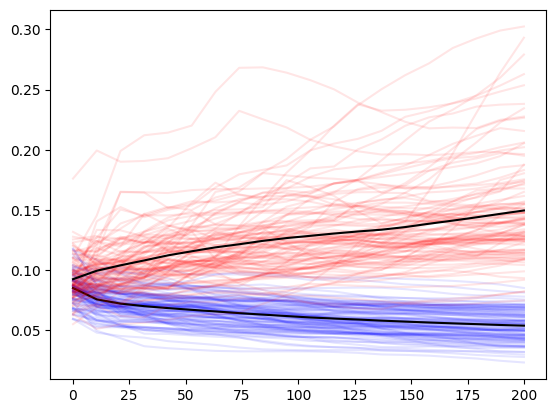

In [88]:
gammas = np.linspace(0.1, 200, 20)
train_trajs = []
test_trajs = []
for _ in range(100):
    X_train, y_train = get_X_y(50)
    X_test, y_test = get_X_y(50)
    train_tr, test_tr = train_test_error_trajectory(X_train, y_train,
                                                X_test, y_test, gammas)
    train_trajs.append(train_tr)
    test_trajs.append(test_tr)

for t in train_trajs:
    plt.plot(gammas, t, c='b', alpha=0.1)

plt.plot(gammas, np.mean(train_trajs, axis=0),c='k')

for t in test_trajs:
    plt.plot(gammas, t, c='r', alpha=0.1)

plt.plot(gammas, np.mean(test_trajs, axis=0),c='k')

plt.show()

In [128]:
def train_test_traj_assessment(X, y, sizes):
    train_traj = []
    test_traj = []

    for s in sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=s)
        m = SVR(kernel='rbf', gamma=5, C=10)
        m.fit(X_train, y_train)
        train_error = metrics.mean_squared_error( \
            m.predict(X_train), y_train)
        test_error = metrics.mean_squared_error( \
            m.predict(X_test), y_test)
        train_traj.append(train_error)
        test_traj.append(test_error)
    return train_traj, test_traj

sizes = np.linspace(0.01, 0.99, 99)
train_trajs = []
test_trajs = []
for _ in range(100):
    X, y = get_X_y(100)
    X = np.expand_dims(X, axis=1)
    train_tr, test_tr = train_test_traj_assessment(X, y, sizes)
    train_trajs.append(train_tr)
    test_trajs.append(test_tr)

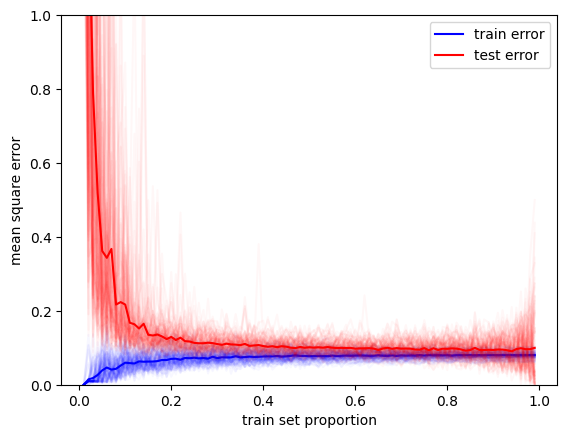

In [132]:
for t in train_trajs:
    plt.plot(sizes, t, c='b', alpha=0.03)

plt.plot(sizes, np.mean(train_trajs, axis=0), c='b', label='train error')

for t in test_trajs:
    plt.plot(sizes, t, c='r', alpha=0.03)

plt.plot(sizes, np.mean(test_trajs, axis=0), c='r', label='test error')

plt.ylim(0, 1)
plt.xlabel('train set proportion')
plt.ylabel('mean square error')
plt.legend()

plt.show()